In [1]:
# Imports
import matplotlib.pyplot as plt
from preamble import *
from DRN_interface import *
from pbarlike import *
# np.set_printoptions(precision=5)

 Loading python backend - pbarlike 1.0
 Imported required python modules - numpy, tensorflow, iminuit.Minuit
 Loaded and processed AMS-02 dataset
 Loaded required custom python modules - DRN_interface, solar_mod
     Loaded pbarlike 1.0


In [2]:
# Reusable params that give preference for DM and other default or best fit params
## Params that give DM preference for run1 + b bbar + marginalization over multinest sample
mDMrun1bb = np.array([100])
svDMrun1bb = 10**(-25.5228)
b_bbar_bf = np.array([0,0,1,0,0,0,0,0])
pmrun1 = "run1"

## Params that give DM preference for DIFF.BRK _ b bbar + marginalization
mDMdb_bb = np.array([2000])
svDMdb_bb = 6e-26
b_bbar_bf = np.array([0,0,1,0,0,0,0,0])
pmdb = "DIFF.BRK"

pp_marg = np.array([0.0])

## From example notebook
m_DM = np.array([100.])
equal_bf = np.ones((1, 8))* 1/8
def_sv = 10**(-25.5228)
pp_run1 = np.array([1.8, 1.79, 2.405, 2.357, 7.92e+03, 0.37, 2.05e+28, 0.419, 8.84, 0.09, 2.60])
pp_db = np.array([2.34, 2.28, 3.63e+28, -0.66, 0.52, -0.15, 3.83e+3, 0.4, 2.05e+5, 0.21])

## Multinest sample
ppdbmarg = np.genfromtxt('dependencies/'+ pmdb +'/multinest_sample.dat')

In [3]:
# Setting params for check
DMmass = np.array([10**(5.018181818181818 - 3)]) #m_DM
bf = b_bbar_bf
prop_params = pp_marg #np.array(ppdbmarg[0,:10])
sigma_v = 5.336699231206302e-27 #def_sv # 6e-27
prop_model = pmdb
prevent_ex = False

In [4]:
# Initializing DRN
prop_parameters = np.array(prop_params)
DRN = DRNet(propagation_parameters=prop_parameters,propagation_model=prop_model,prevent_extrapolation=prevent_ex)

The number of propagation parameters is not consistent with the propagation model. The default multinest sample will be used for marginalization.

 The simulation tool has been initiated. 



In [5]:
DRN.phi_CR_LIS,DRN.phi_CR


(<tf.Tensor: shape=(11989, 28), dtype=float32, numpy=
 array([[4.44313418e-03, 6.24241354e-03, 9.03372187e-03, ...,
         4.53274367e-07, 2.10914706e-07, 9.79591093e-08],
        [4.70911851e-03, 6.59710169e-03, 9.51911416e-03, ...,
         4.56660416e-07, 2.12308990e-07, 9.85193296e-08],
        [4.79628192e-03, 6.64479332e-03, 9.48096998e-03, ...,
         4.75617469e-07, 2.24816674e-07, 1.06267066e-07],
        ...,
        [4.81468253e-03, 6.68636616e-03, 9.56585910e-03, ...,
         4.74493561e-07, 2.22553510e-07, 1.04273219e-07],
        [4.68800869e-03, 6.50683232e-03, 9.30525269e-03, ...,
         4.71407162e-07, 2.21983711e-07, 1.04515202e-07],
        [4.67590755e-03, 6.52126549e-03, 9.36915260e-03, ...,
         4.66679523e-07, 2.18718611e-07, 1.02399511e-07]], dtype=float32)>,
 array([[6.37562447e-03, 8.07946326e-03, 9.99459754e-03, ...,
         6.17762235e-07, 3.13918714e-07, 9.98123567e-08],
        [6.70698059e-03, 8.53937839e-03, 1.05436214e-02, ...,
         6.22

In [6]:
DRN.chi2_CR_uncorr,DRN.chi2_CR_corr,DRN.CR_marginalized_likelihood

(array([40.44305317, 41.51970908, 28.86423348, ..., 28.62467633,
        29.41739222, 31.00491955]),
 array([ 93.34333252, 100.2801603 ,  94.33888199, ...,  96.87571698,
         93.91978789,  94.18686814]),
 4.757442135262155e-09)

In [7]:
# Preprocessing DM params
DRN.preprocessing_DMparams(DM_mass=DMmass,br_fr=bf,sigma_v=sigma_v)

In [8]:
# DM simulation
phi_DM_LIS = DRN.LIS_sim()
phi_DMCR = DRN.TOA_sim(phi_DM_LIS)

In [9]:
phi_DM_LIS

array([[0.0013706 , 0.00141383, 0.00141137, ..., 0.        , 0.        ,
        0.        ],
       [0.00145329, 0.00149672, 0.00148933, ..., 0.        , 0.        ,
        0.        ],
       [0.00150675, 0.00154621, 0.00153393, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00145315, 0.00149355, 0.0014849 , ..., 0.        , 0.        ,
        0.        ],
       [0.0014443 , 0.001484  , 0.0014757 , ..., 0.        , 0.        ,
        0.        ],
       [0.00142258, 0.00146357, 0.00145705, ..., 0.        , 0.        ,
        0.        ]])

In [10]:
phi_DMCR

array([[6.83060447e-03, 8.58514889e-03, 1.05332932e-02, ...,
        6.17762235e-07, 3.13918714e-07, 9.98123567e-08],
       [7.20565482e-03, 9.08819557e-03, 1.11273213e-02, ...,
        6.22213958e-07, 3.16285824e-07, 1.00418110e-07],
       [7.00864552e-03, 8.77742614e-03, 1.07306865e-02, ...,
        6.48978300e-07, 3.31833125e-07, 1.08218217e-07],
       ...,
       [7.03772541e-03, 8.82221554e-03, 1.07955281e-02, ...,
        6.46186818e-07, 3.29764545e-07, 1.06199061e-07],
       [6.90807576e-03, 8.65917146e-03, 1.05955541e-02, ...,
        6.43465162e-07, 3.28317935e-07, 1.06448989e-07],
       [6.94502585e-03, 8.71608740e-03, 1.06780118e-02, ...,
        6.35860244e-07, 3.24216005e-07, 1.04293442e-07]])

In [11]:
# Uncorrelated log likelihood
del_chi2 = DRN.del_chi2(phi_DMCR)
DRN.chi2(phi_DMCR)

array([40.20432556, 69.22015261, 37.23012021, ..., 46.40317578,
       36.63231203, 36.6523769 ])

In [12]:
# Correlated log likelihood
del_chi2_corr = DRN.del_chi2_corr(phi_DMCR)
result = {'uncorrelated' : del_chi2 , 'correlated' : del_chi2_corr}

In [13]:
#%% Results
print('del_chi2 = ', result["uncorrelated"])
print('del_chi_cov = ', result["correlated"])

del_chi2 =  -0.2138893222946546
del_chi_cov =  -2.9267410416406734


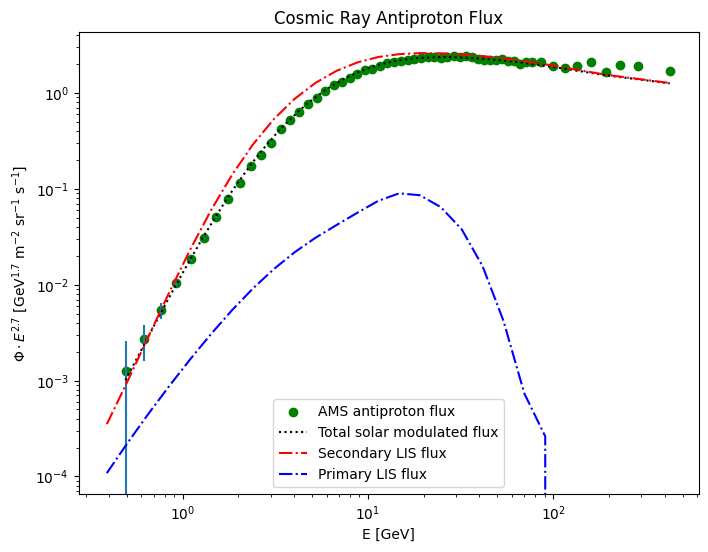

In [14]:
# Plot of solar modulated DM+CR flux and AMS flux
DM_LIS = phi_DM_LIS[0]
S_flux = DRN.phi_CR_LIS[0]
DMCR_flux = phi_DMCR[0]

DM_E = E_ams
S_E = E_ams

plt.figure(figsize=(8,6))
plt.title('Cosmic Ray Antiproton Flux')
plt.scatter(E_ams, E_ams**2.7 * phi_ams, c='g', label = 'AMS antiproton flux')
plt.errorbar(E_ams,E_ams**2.7*phi_ams,error_ams,linestyle = '')
plt.plot(DM_E, DM_E**2.7 * DMCR_flux,  c = 'black', linestyle = 'dotted', label = 'Total solar modulated flux')
plt.plot(E_drn, E_drn**2.7 * S_flux,c='r', linestyle = 'dashdot', label = 'Secondary LIS flux ')
plt.plot(E_drn, E_drn**2.7 * DM_LIS,c='b', linestyle = 'dashdot', label = 'Primary LIS flux')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\Phi \cdot E^{2.7}$ [GeV$^{1.7}$ m$^{-2}$ sr$^{-1}$ s$^{-1}$]')
plt.xlabel('E [GeV]')
plt.show()
